## Plot background traffic data

In [6]:
import numpy as np
from numpy import genfromtxt
background_bw = genfromtxt('background-bw.csv', delimiter=',')
print(type(background_bw))
print(background_bw.shape)
num = int(len(background_bw))
print('maximum background bandwidth: {} bytes per second'.format(np.amax(background_bw, axis=0)[1]))
print('minimum background bandwidth: {} bytes per second'.format(np.amin(background_bw, axis=0)[1]))
print('number of data samples: {}'.format(num))

<class 'numpy.ndarray'>
(952, 2)
maximum background bandwidth: 1521460.0 bytes per second
minimum background bandwidth: 247776.0 bytes per second
number of data samples: 952


Text(0.5, 0, 'Seconds')

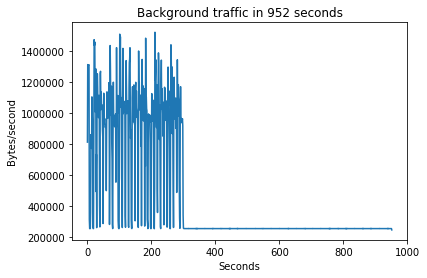

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(background_bw[:, 0],background_bw[:, 1])
plt.title('Background traffic in 952 seconds')
plt.ylabel('Bytes/second')
plt.xlabel('Seconds')

Text(0.5, 0, 'Seconds')

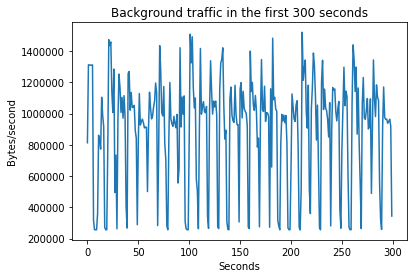

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(background_bw[0:300, 0],background_bw[0:300, 1])
plt.title('Background traffic in the first 300 seconds')
plt.ylabel('Bytes/second')
plt.xlabel('Seconds')

## Derive and plot the bandwidth capacity of our flows

(300,)
Maximum bandwidth capacity of our flows: 1266208.0
Minimum bandwidth capacity of our flows: 0.0


Text(0.5, 0, 'Seconds')

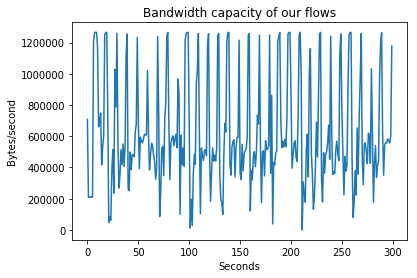

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
capacity_ours = np.amax(background_bw, axis=0)[1] - background_bw[0:300,1]
print(capacity_ours.shape)
capacity_min, capacity_max = np.amin(capacity_ours), np.amax(capacity_ours)
print('Maximum bandwidth capacity of our flows: {}'.format(capacity_max))
print('Minimum bandwidth capacity of our flows: {}'.format(capacity_min))
plt.plot(background_bw[0:300,0], capacity_ours[0:300])
plt.title('Bandwidth capacity of our flows')
plt.ylabel('Bytes/second')
plt.xlabel('Seconds')

## Fit the data of bandwidth capacity of our flows into a 20-point distribution

In [28]:
prob  = np.zeros(20)
interval = (capacity_max - capacity_min) / 20
for capacity in capacity_ours:
    prob[int(np.ceil((capacity-capacity_min)/interval))-1] += 1
prob = prob / num
print('Index of the bandwidth range with maximum probability: {}'.format(np.argmax(prob)))
print('Length of each bandwidth range: {} bytes per seconds'.format(interval))
print('Distribution: {}'.format(prob))
np.savetxt('state_dist.txt', prob)

Index of the bandwidth range with maximum probability: 19
Length of each bandwidth range: 63310.4 bytes per seconds
Distribution: [0.0052521  0.00735294 0.00840336 0.01470588 0.00420168 0.02836134
 0.02941176 0.03781513 0.04831933 0.03361345 0.0105042  0.01260504
 0.00210084 0.00420168 0.00210084 0.0052521  0.00420168 0.00210084
 0.0052521  0.04936975]
